Pierre Navaro - [Institut de Recherche Mathématique de Rennes](https://irmar.univ-rennes1.fr) - [CNRS](http://www.cnrs.fr/)

# References

* [Laurent Gautier](https://github.com/lgautier/pragmatic-polyglot-data-analysis)
* [PySpark Internals](https://cwiki.apache.org/confluence/display/SPARK/PySpark+Internals)
* [Apache Spark website](http://spark.apache.org)

# Installation
```sh
 pip3 install findspark
 brew install apache-spark
 pip3 install pyspark
```

*Note: PySpark requires a little additional setup. Usually, the following environment variables need to be set (using `/usr/libexec/java_home` on OS X or similar on Linux)*:

```
JAVA_HOME
JAVA_JRE
```

*Also, VPNs can interfere with PySpark, so you may need to disable yours if you are running PySpark locally.*

![PySpark Internals](http://i.imgur.com/YlI8AqEl.png)

Apache Spark provides APIs in non-JVM languages such as Python. Many data scientists use Python because it has a rich variety of numerical libraries with a statistical, machine-learning, or optimization focus.
[Cloudera website](https://www.cloudera.com/documentation/enterprise/5-5-x/topics/spark_ipython.html)

In [1]:
import findspark
findspark.init()

import pyspark

conf = pyspark.conf.SparkConf()
(conf.setMaster('local[2]')
 .setAppName('ipython-notebook')
 .set("spark.executor.memory", "2g"))

sc = pyspark.SparkContext(conf=conf)

We have a spark context sc to use with a tiny local spark cluster with 2 nodes (will work just fine on a multicore machine).

# Parallel Collections

Systems like Spark and Dask include "big data" collections with a small set of high-level primitives like `map`, `filter`, `groupby`, and `join`.  With these common patterns we can often handle computations that are more complex than map, but are still structured.




In [2]:
rdd = sc.parallelize(range(5))  # create collection
rdd

PythonRDD[1] at RDD at PythonRDD.scala:48

In [3]:
rdd.collect()  # Gather results back to local process

[0, 1, 2, 3, 4]

### map

In [4]:
rdd.map(lambda x: x ** 2) # Square each element

PythonRDD[2] at RDD at PythonRDD.scala:48

In [5]:
rdd.map(lambda x: x ** 2).collect() # Square each element and collect results

[0, 1, 4, 9, 16]

In [6]:
rdd.filter(lambda x: x % 2 == 0).collect() # Select only the even elements‹

[0, 2, 4]

In [10]:
# Cartesian product of each pair of elements in two sequences 
# (or the same sequence in this case)
rdd.cartesian(rdd).collect()[:8]

[(0, 0), (0, 1), (1, 0), (1, 1), (0, 2), (0, 3), (0, 4), (1, 2)]

In [25]:
# Chain operations to construct more complex computations

(rdd.map(lambda x: x ** 2)
    .cartesian(rdd)
    .filter(lambda tup: tup[0] % 2 == 0)
    .collect())

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (4, 0),
 (4, 1),
 (16, 0),
 (16, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (16, 2),
 (16, 3),
 (16, 4)]

In [ ]:
rdd.

# Dask bag

In [23]:
import dask.bag as db

b = db.from_sequence(range(5))
result = (b.map(lambda x: x * x)
          .product(b)
          .filter(lambda tup: tup[0] % 2 == 0))

result.compute()  # Effective computation of the lazy object


[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (16, 0),
 (16, 1),
 (16, 2),
 (16, 3),
 (16, 4)]

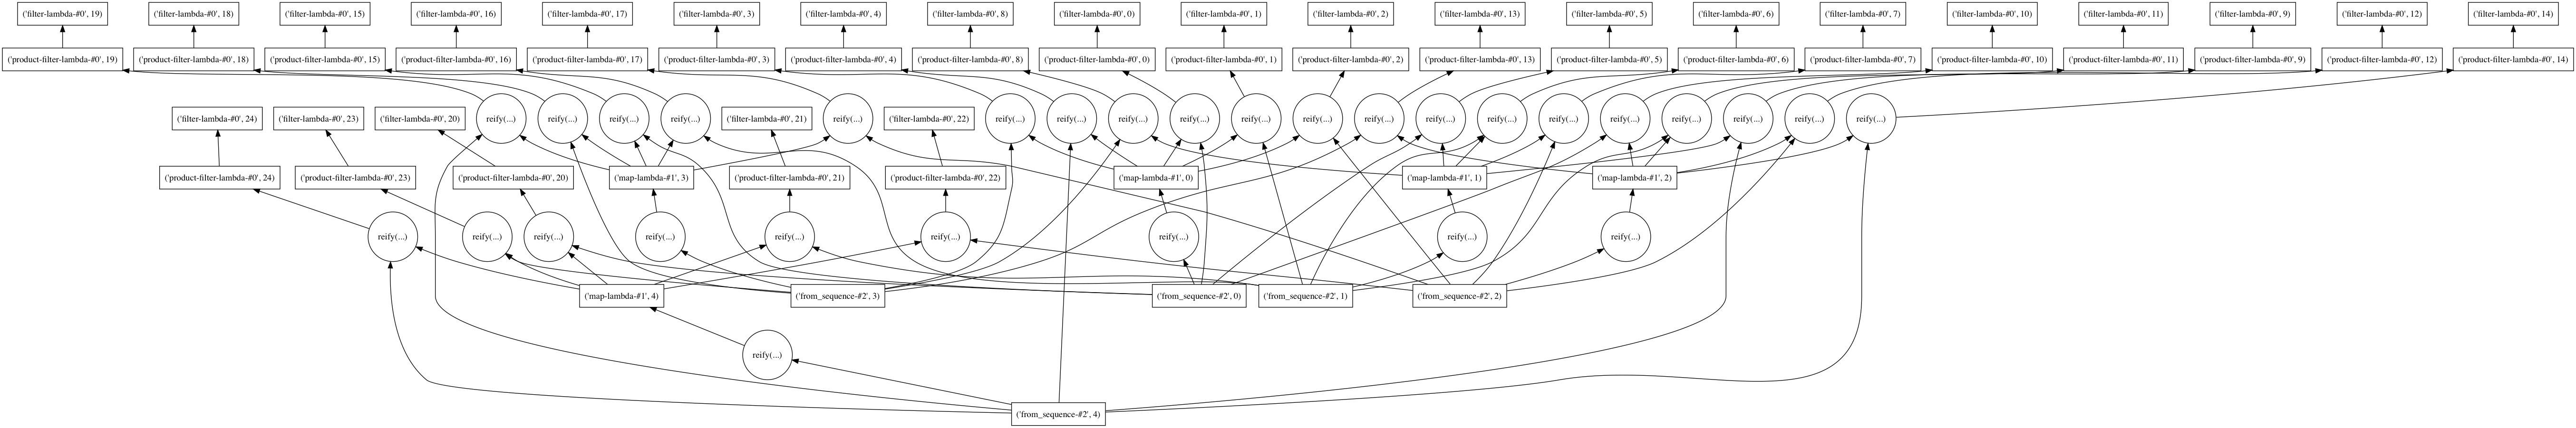

In [26]:
result.visualize(optimize_graph=True)